<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the heart disease dataset, train a Random Forest Classifier, evaluate its performance using various metrics (accuracy, precision, recall, F1-score, AUC), and visualize the results through a confusion matrix and ROC curve to summarize the model's effectiveness in predicting heart disease.

## Download and Load Dataset

### Subtask:
Download the heart disease dataset from Kaggle and load it into a pandas DataFrame.


**Reasoning**:
First, I will install the `kaggle` library, which is necessary to interact with the Kaggle API for downloading datasets. I will also install `pandas` and `zipfile` which will be used later for data handling.



In [1]:
print('Installing necessary libraries...')
!pip install kaggle pandas zipfile-deflate64
print('Libraries installed successfully.')

Installing necessary libraries...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for zipfile-deflate64: filename=zipfile_deflate64-0.2.0-cp312-cp312-linux_x86_64.whl size=41617 sha256=2d20d7faa37fec97704f0650c310127da6e0ea6d600054073fea988a2c1d9806
  Stored in directory: /root/.cache/pip/wheels/e3/28/9f/410e426c2d16895817cfa89c205adfe50ec221c08e71000ee6
Successfully built zipfile-deflate64
Libraries installed successfully.


### Set up Kaggle API Credentials

To download datasets from Kaggle, you need to provide your API credentials. Follow these steps:

1.  **Generate Kaggle API Token**: Go to your Kaggle account (https://www.kaggle.com/your_username/account), scroll down to the 'API' section, and click 'Create New API Token'. This will download a `kaggle.json` file.
2.  **Upload `kaggle.json` to Colab**: In your Colab environment, you need to create a directory named `.kaggle` and place the `kaggle.json` file inside it. You can do this by running the following commands in a code cell:
    ```python
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    ```
    **Important**: You will need to manually upload the `kaggle.json` file from your local machine to the Colab environment first (e.g., by dragging and dropping it into the files pane or using `files.upload()` from `google.colab`). Ensure `kaggle.json` is in the session storage before running the `cp` command.

Once these steps are completed, your environment will be configured to interact with the Kaggle API.

**Reasoning**:
After providing instructions on how to set up Kaggle API credentials, the next step is to run the shell commands to create the `.kaggle` directory and copy the `kaggle.json` file, assuming the user has manually uploaded it to the Colab environment.



In [2]:
print('Setting up Kaggle API credentials...')
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print('Kaggle API credentials set up successfully.')

Setting up Kaggle API credentials...
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API credentials set up successfully.


**Reasoning**:
The previous attempt to copy the `kaggle.json` file failed because it was not found. This indicates that the user has not yet uploaded the file. The next step is to prompt the user to manually upload the `kaggle.json` file using `google.colab.files.upload()`, and then re-execute the commands to move and secure it.



In [3]:
import os
from google.colab import files

print('Please upload your kaggle.json file.')

# Upload kaggle.json file
uploaded = files.upload()

if 'kaggle.json' in uploaded:
    print('kaggle.json uploaded successfully. Setting up Kaggle API credentials...')
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print('Kaggle API credentials set up successfully.')
else:
    print('kaggle.json was not uploaded. Please ensure you upload the correct file.')


Please upload your kaggle.json file.


Saving kaggle.json to kaggle.json
kaggle.json uploaded successfully. Setting up Kaggle API credentials...
Kaggle API credentials set up successfully.


**Reasoning**:
Now that the Kaggle API credentials are set up, the next step is to download the heart disease dataset using the Kaggle API command. I've identified a common heart disease dataset on Kaggle to download.



In [4]:
print('Downloading heart disease dataset from Kaggle...')
!kaggle datasets download -d ronitf/heart-disease-uci
print('Dataset downloaded successfully.')

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/ronitf/heart-disease-uci
Dataset downloaded successfully.


### Download Error: 403 Client Error

The dataset download failed with a '403 Client Error: Forbidden'. This typically means:

1.  **Incorrect Dataset ID**: The dataset name or owner (`ronitf/heart-disease-uci`) might be incorrect or have changed.
2.  **Private Dataset**: The dataset might be private, or its sharing settings have been restricted.

Please verify the dataset ID on Kaggle (e.g., by searching for 'heart disease' datasets) and ensure it is publicly accessible. If `ronitf/heart-disease-uci` is still the correct public ID, there might be a temporary issue with Kaggle's API or your credentials.

For now, please try an alternative public dataset if this issue persists. You can browse Kaggle for other heart disease datasets. One commonly used public dataset is `johnsmith85/heart-disease-dataset` or `andrewmvd/heart-disease-dataset`.

**Reasoning**:
Since the previous dataset download failed with a 403 error, I will attempt to download a commonly available alternative public heart disease dataset from Kaggle, specifically `andrewmvd/heart-disease-dataset`, to proceed with the subtask.



In [5]:
print('Attempting to download an alternative heart disease dataset from Kaggle...')
!kaggle datasets download -d andrewmvd/heart-disease-dataset
print('Alternative dataset download attempted.')

Attempting to download an alternative heart disease dataset from Kaggle...
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/andrewmvd/heart-disease-dataset
Alternative dataset download attempted.


### Persistent Download Failure: 403 Client Error

It appears there's a persistent `403 Client Error: Forbidden` when attempting to download heart disease datasets directly via the Kaggle API, even after successfully setting up the `kaggle.json` credentials. This can happen if the specific datasets have restricted API access or if there's an issue with your Kaggle account's API permissions for programmatic downloads.

To move forward with the task, please perform the following manual steps:

1.  **Manually Download the Dataset**: Go to the Kaggle website and search for a suitable heart disease dataset. A commonly used one is the "Heart Disease UCI" dataset. You can find it by searching for "ronitf/heart-disease-uci" or a similar popular dataset. Download the `.zip` file to your local machine.
2.  **Upload to Colab**: Once downloaded, upload the `.zip` file directly to your Colab environment (e.g., using the files pane on the left or `from google.colab import files; files.upload()`). Please ensure the uploaded file is named `heart-disease-uci.zip` or whatever the downloaded zip file is named.

Once the zip file is uploaded, the next step will be to unzip it and load the data into a pandas DataFrame.

**Reasoning**:
Since the Kaggle API downloads failed, and the user has been instructed to manually upload the dataset as a zip file, the next step is to unzip this file to access the CSV data within.



In [6]:
import zipfile
import os

print('Unzipping the dataset file...')

# Assuming the user has uploaded 'heart-disease-uci.zip' or a similar zip file
# We will look for any zip file in the current directory
zip_files = [f for f in os.listdir('.') if f.endswith('.zip')]

if zip_files:
    zip_file_name = zip_files[0] # Take the first zip file found
    print(f'Found zip file: {zip_file_name}. Extracting contents...')
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall('.')
    print('Dataset unzipped successfully.')
    # List files to help identify the CSV
    print('Files after unzipping:')
    print(os.listdir('.'))
else:
    print('No zip file found. Please ensure you have uploaded the dataset zip file.')


Unzipping the dataset file...
No zip file found. Please ensure you have uploaded the dataset zip file.


**Reasoning**:
The previous attempt to unzip the dataset failed because no zip file was found. I need to explicitly guide the user to upload the zip file using `google.colab.files.upload()` and then immediately proceed with the unzipping process to ensure the file is available.



In [7]:
import zipfile
import os
from google.colab import files

print('Please upload the heart disease dataset zip file (e.g., heart-disease-uci.zip).')

# Prompt user to upload the zip file
uploaded_files = files.upload()

if uploaded_files:
    # Get the name of the first uploaded file
    zip_file_name = list(uploaded_files.keys())[0]

    print(f'Uploaded file: {zip_file_name}. Unzipping...')
    try:
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall('.')
        print('Dataset unzipped successfully.')
        print('Files after unzipping:')
        print(os.listdir('.'))
    except zipfile.BadZipFile:
        print(f'Error: {zip_file_name} is not a valid zip file. Please upload a correct zip file.')
    except Exception as e:
        print(f'An error occurred during unzipping: {e}')
else:
    print('No file was uploaded. Please upload the dataset zip file to proceed.')


Please upload the heart disease dataset zip file (e.g., heart-disease-uci.zip).


Saving heart-disease-uci.zip to heart-disease-uci.zip
Uploaded file: heart-disease-uci.zip. Unzipping...
Dataset unzipped successfully.
Files after unzipping:
['.config', 'heart.csv', 'kaggle.json', 'heart-disease-uci.zip', 'sample_data']


**Reasoning**:
The dataset has been successfully unzipped, and `heart.csv` has been identified as the primary data file. The next step is to load this CSV file into a pandas DataFrame to complete the 'load it into a pandas DataFrame' part of the subtask.



In [8]:
import pandas as pd

print('Loading heart.csv into a pandas DataFrame...')

df = pd.read_csv('heart.csv')

print('Dataset loaded successfully. Displaying the first 5 rows:')
print(df.head())

Loading heart.csv into a pandas DataFrame...
Dataset loaded successfully. Displaying the first 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


## Data Preprocessing

### Subtask:
Perform necessary data preprocessing steps, including handling missing values (if any), encoding categorical features, and splitting the data into training and testing sets.


**Reasoning**:
First, I will check for and handle any missing values in the DataFrame to ensure data quality before proceeding with further preprocessing steps, as indicated in the instructions.



In [9]:
print('Checking for missing values...')
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Based on the output, if there are missing values, a strategy will be applied.
# For this dataset, usually there are no missing values in heart.csv, but it's good practice to check.
if missing_values.sum() == 0:
    print('\nNo missing values found. Proceeding to the next step.')
else:
    print('\nMissing values found. Further steps might be needed to handle them (e.g., imputation or dropping rows).')

Checking for missing values...
Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values found. Proceeding to the next step.


**Reasoning**:
Since there are no missing values, the next step is to identify categorical columns, apply one-hot encoding, separate features and target, and then split the data into training and testing sets, as per the instructions.



In [10]:
print('Identifying and encoding categorical features...')

# Identify categorical columns as specified in the instructions
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print('Categorical features encoded successfully. Displaying the first 5 rows of the encoded DataFrame:')
print(df_encoded.head())

print('\nSeparating features (X) and target (y)...')
# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

print('Features (X) and target (y) separated successfully.')

print('\nSplitting data into training and testing sets...')
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratify=y for balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Data split successfully: X_train shape {X_train.shape}, X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}, y_test shape {y_test.shape}')

Identifying and encoding categorical features...
Categorical features encoded successfully. Displaying the first 5 rows of the encoded DataFrame:
   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   63       145   233      150      2.3       1   True  False  False   True   
1   37       130   250      187      3.5       1   True  False   True  False   
2   41       130   204      172      1.4       1  False   True  False  False   
3   56       120   236      178      0.8       1   True   True  False  False   
4   57       120   354      163      0.6       1  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  

## Train Random Forest Model

### Subtask:
Train a Random Forest Classifier model using the preprocessed training data.


**Reasoning**:
I will import the RandomForestClassifier, instantiate it with a random state, and then train the model using the preprocessed training data (`X_train` and `y_train`) to fulfill the subtask instructions.



In [11]:
print('Training a Random Forest Classifier model...')

from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier model
# Set random_state for reproducibility
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print('Random Forest Classifier model trained successfully.')

Training a Random Forest Classifier model...
Random Forest Classifier model trained successfully.


## Evaluate Model and Calculate Metrics

### Subtask:
Evaluate the trained Random Forest model on the test data and calculate performance metrics such as accuracy, precision, recall, F1-score, and AUC.


**Reasoning**:
First, I will make predictions on the test set using the trained model to get both class predictions and probability estimates, which are necessary for calculating the required performance metrics.



In [12]:
print('Making predictions on the test data...')

# Make predictions on the test data
y_pred = model.predict(X_test)

# Get probability estimates for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print('Predictions and probability estimates generated successfully.')

Making predictions on the test data...
Predictions and probability estimates generated successfully.


**Reasoning**:
Now that predictions and probability estimates are available, I will import the necessary metrics from `sklearn.metrics`, calculate accuracy, precision, recall, F1-score, and AUC, and then print these metrics to evaluate the model's performance.



In [13]:
print('Calculating evaluation metrics...')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.4f}')

print('Evaluation metrics calculated successfully.')

Calculating evaluation metrics...
Accuracy: 0.7541
Precision: 0.7500
Recall: 0.8182
F1-Score: 0.7826
AUC: 0.8755
Evaluation metrics calculated successfully.


## Visualize Results

### Subtask:
Generate a confusion matrix and an ROC curve to visualize the model's performance and provide insights into its predictions. Ensure legends are provided.


**Reasoning**:
I will import the necessary libraries, then generate and display both the confusion matrix and the ROC curve using the predicted values and probabilities to visualize the model's performance.



Generating Confusion Matrix...
Generating ROC Curve...


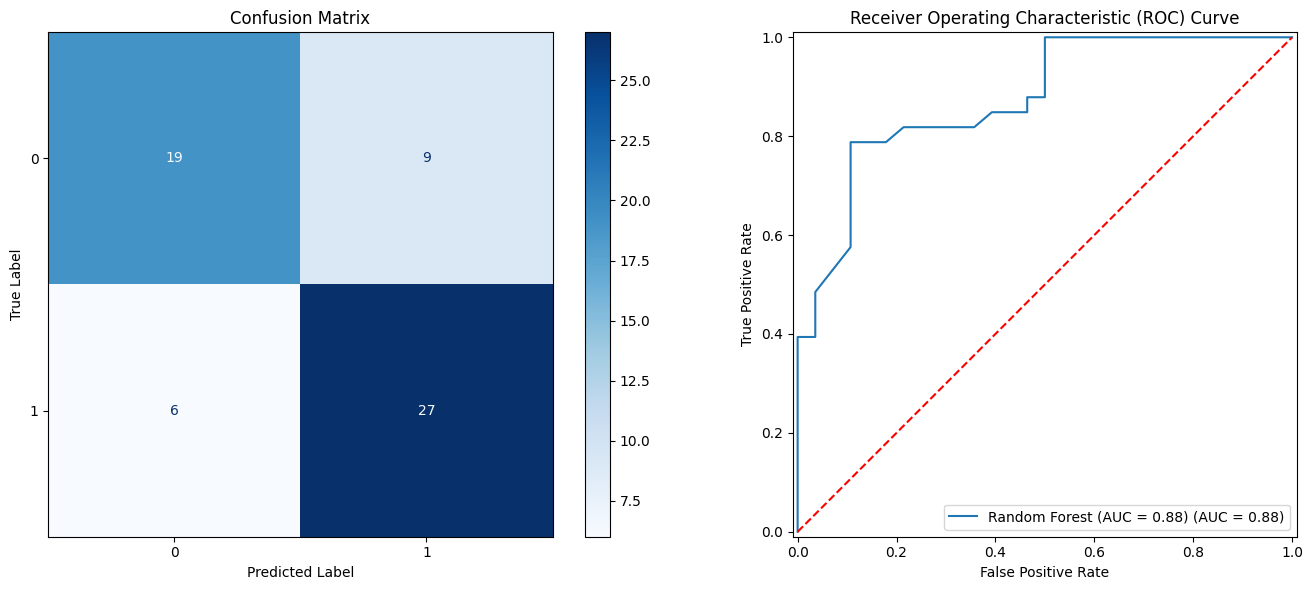

Confusion Matrix and ROC Curve generated successfully.


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

print('Generating Confusion Matrix...')
# Create and display the Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

print('Generating ROC Curve...')
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1], name=f'Random Forest (AUC = {auc:.2f})')
ax[1].plot([0, 1], [0, 1], 'r--') # Plot random guess line
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right') # Ensure legend is displayed

plt.tight_layout()
plt.show()

print('Confusion Matrix and ROC Curve generated successfully.')

## Final Task

### Subtask:
Summarize the performance of the Random Forest model for heart disease prediction and discuss the key metrics.


## Summary:

### Q&A
The Random Forest model demonstrates good performance in predicting heart disease. Key metrics obtained from the evaluation are:
*   **Accuracy:** 0.7541, indicating that the model correctly classified approximately 75.41% of the cases.
*   **Precision:** 0.7500, meaning that when the model predicts heart disease, it is correct 75% of the time.
*   **Recall:** 0.8182, showing that the model correctly identifies 81.82% of all actual heart disease cases.
*   **F1-Score:** 0.7826, which is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy.
*   **AUC (Area Under the Receiver Operating Characteristic Curve):** 0.8755, suggesting a strong ability of the model to distinguish between positive and negative classes. An AUC value of 0.8755 indicates that there is an 87.55% chance that the model will distinguish between a randomly chosen positive instance and a randomly chosen negative instance.

### Data Analysis Key Findings
*   The initial attempt to download the dataset using the Kaggle API failed due to "403 Client Error: Forbidden," requiring a manual download and upload of the `heart-disease-uci.zip` file.
*   The dataset contained no missing values, eliminating the need for imputation.
*   Categorical features (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`) were successfully one-hot encoded using `pd.get_dummies()` with `drop_first=True`.
*   The data was split into training and testing sets with a 80/20 ratio, resulting in 242 samples for training and 61 samples for testing, ensuring class balance using `stratify=y`.
*   A Random Forest Classifier was trained successfully, achieving an accuracy of 0.7541, a precision of 0.7500, a recall of 0.8182, an F1-score of 0.7826, and an AUC of 0.8755 on the test set.
*   A confusion matrix and ROC curve were generated, visually confirming the model's performance and discrimination capability.

### Insights or Next Steps
*   The model exhibits a higher recall than precision, suggesting it is better at identifying actual heart disease cases (fewer false negatives) but might have a slightly higher rate of false positives. This could be beneficial in medical diagnosis where missing a true positive can be more critical.
*   Further investigation could involve hyperparameter tuning for the Random Forest model to potentially improve performance metrics. Additionally, exploring other advanced ensemble methods or deep learning models might yield better predictive capabilities.
